# Sprint 6 - T1

**Ejercicios para practicar con regresiones**

### Ejercicio 1

**Crea almenos dos modelos de regressión diferentes para intentar predecir el mejor precio posible de las viviendas (MEDV) del archivo adjunto.**

El archivo que vamos a usar para este ejercicio es el mismo archivo que usamos para el Sprint 5 Tarea 2.

Fuente del dataset:.

Title: Boston Housing Data

Sources: (a) Origin: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. (b) Creator: Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. (c) Date: July 7, 1993

Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute. Esto indica que hay una variable que es binaria (seguramente se podrá convertir en categoría). También nos indica que la variable MEDV está considerada "variable clase".

Las variables de este dataset son las siguientes:
    
1. **CRIM**: Tasa de criminalidad per cápita por ciudad.
2. **ZN**: Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados. Valor más pequeño significa zona con edificios más altos y casas más juntas. 
3. **INDUS**: Proporción de acres de negocios no minoristas por ciudad.
4. **CHAS**: Variable ficticia Charles River (= 1 si el terreno limita con el río; 0 en caso contrario).
5. **NOX**: Concentración de óxidos de nitrógeno (partes por cada 10 millones).
6. **RM**: Número promedio de habitaciones por vivienda.
7. **AGE**: Proporción de unidades ocupadas por propietarios construidas antes de 1940.
8. **DIS**: Distancias ponderadas a cinco centros de empleo en Boston.
9. **RAD**: Índice de accesibilidad a carreteras radiales.
10. **TAX**: Tasa de impuesto a la propiedad de valor completo por cada 10,000UDS.
11. **PTRATIO**: Relación entre estudiantes y profesores por ciudad.
12. **B**: 1000(Bk - 0.63)^2 donde Bk es la proporción de población afroamericana por ciudad.
13. **LSTAT**: Porcentaje de población de estatus socioeconómico bajo.
14. **MEDV**: Valor mediano de las viviendas ocupadas por sus propietarios en 1000USD.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ruta_archivo= "C:\\Users\\gemma\\OneDrive\\Escritorio\\It Academy Tasks\\SP 6 T1\\housing data.csv"

#El dataset no tenía los nombres de los atributos incluidos. Los ponemos manualmente con names.

df_houses = pd.read_csv(ruta_archivo, names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])

df_houses.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
df_houses.shape

(506, 14)

In [3]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Nos encontramos ante un dataset de 506 registros y 13 variables. La mayoría de los datos son float a excepción de las columnas "CHAS" y "RAD". Este dataset no contiene valores null.

Como trabajamos con este dataset en el ejercicio anterior, sabemos que este dataset está limpio. No contiene valores duplicados, ni valores nulos ni NANs. Pero si que es necesario hacer modificaciones en la columna "RAD" que es una variable categórica y en la variable "CHAS" que es una variable binaria.

In [4]:
df_houses["RAD"]=df_houses["RAD"].astype("category")
df_houses["CHAS"]= df_houses["CHAS"].astype("category")
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [5]:
df_houses.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


Como nos ha indicado el enunciado, nuestra variable target es MEDV. Haremos un histograma para ver la distribución de sus datos, y un boxplot para ver además de su distribución si tiene outliers.

<function matplotlib.pyplot.show(close=None, block=None)>

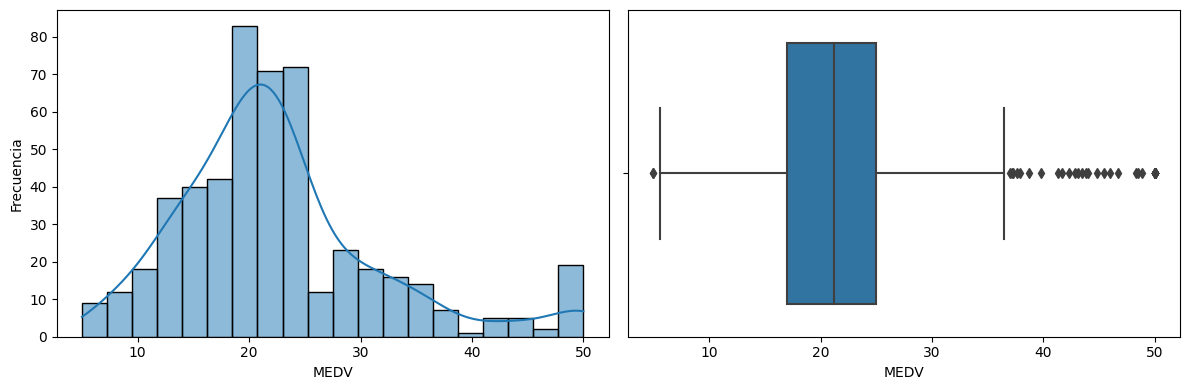

In [6]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data=df_houses, x="MEDV", bins = 20, kde= True)
plt.xlabel ("MEDV")
plt.ylabel ("Frecuencia")

plt.subplot (1,2,2)
sns.boxplot(data=df_houses, x="MEDV")
plt.xlabel("MEDV")

plt.tight_layout()
plt.show

Gracias a estos gráficos podemos ver la distribución de los datos de la variable "MEDV". Observamos que no se trata de una distribución normal. También podemos observar que la variable tiene muchos outliers en la parte superior de los valores. Calcularemos el total de outliers que tiene esta variable.

In [7]:
Q1 = df_houses["MEDV"].quantile(0.25)
Q3 = df_houses["MEDV"].quantile(0.75)
IQR = Q3-Q1

# Se considera normalidad dentro de este rango IQR * 1.5
umbral = IQR * 1.5 

outliers = (df_houses["MEDV"] < (Q1 - umbral)) | (df_houses["MEDV"] > (Q3 + umbral))

# Calcula el total de outliers
total_outliers = outliers.sum()

# Calcula el % sobre el total de registros
total_filas=len(df_houses)
percentage_outliers = round((total_outliers / total_filas)*100,2)

print("El total de outliers en la variable MEDV es:", total_outliers)
print("Esto representa un ", percentage_outliers, "% del total de registros.")




El total de outliers en la variable MEDV es: 40
Esto representa un  7.91 % del total de registros.


EL siguiente paso será ver las distribucuines del resto de las variables.

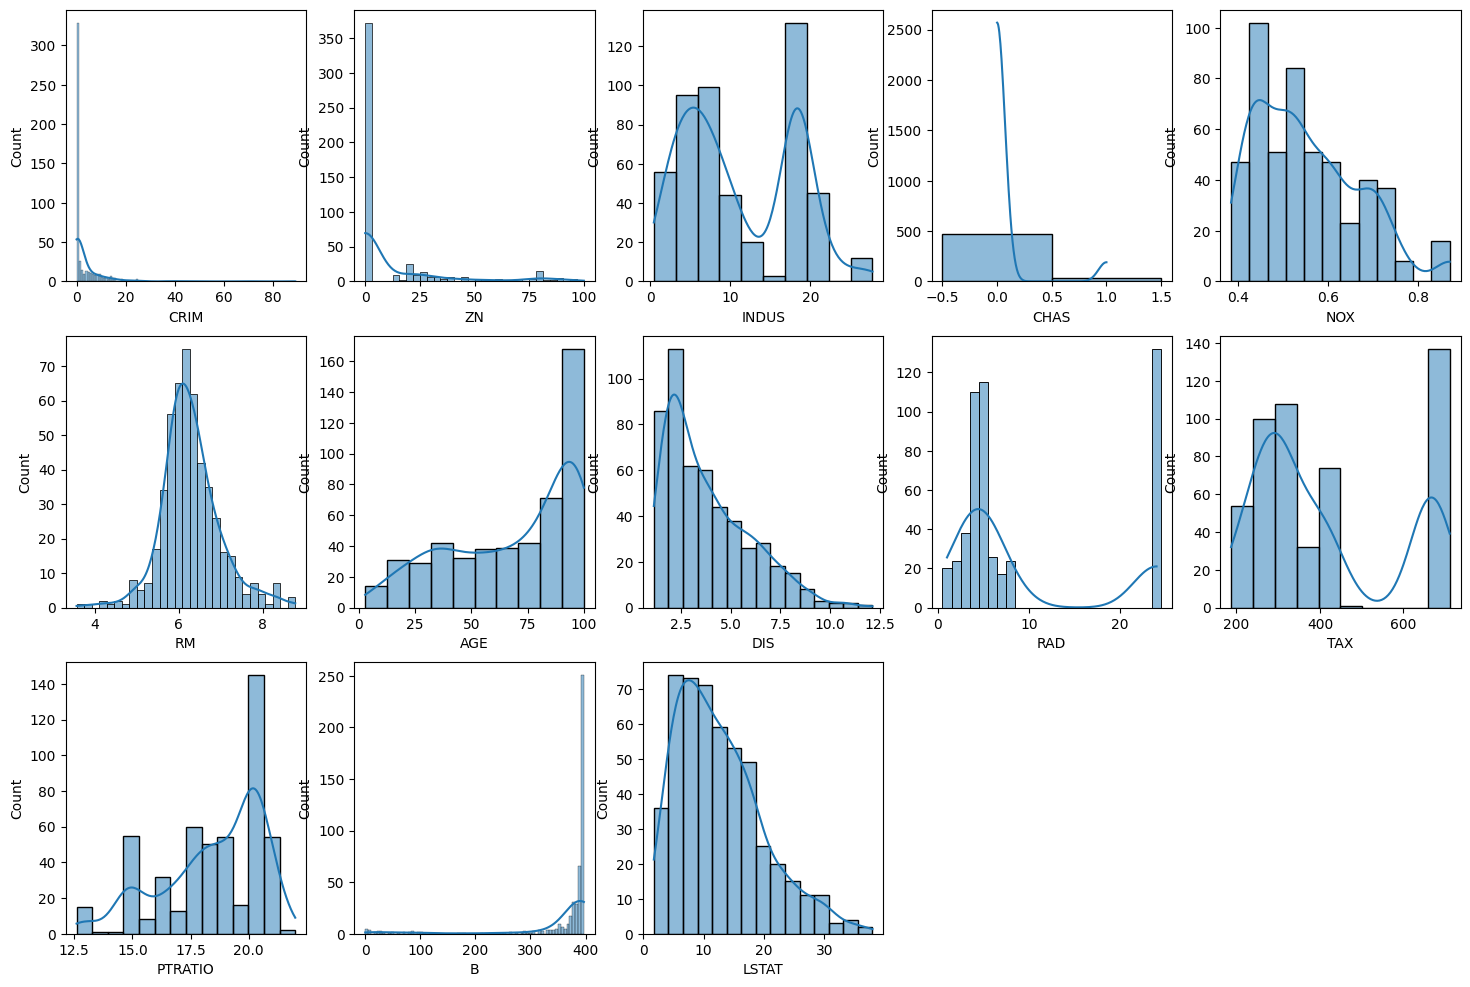

In [8]:
columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

plt.figure(figsize=(18, 12))

for columna in columns:
  
    plt.subplot(3, 5, df_houses.columns.get_loc(columna) + 1)
    sns.histplot(data=df_houses[columna],kde=True)
    plt.xlabel(columna)
    
    plt.show

In [9]:
from scipy.stats import shapiro
from tabulate import tabulate

# Creamos una lista para almacenar los resultados de la prueba
resultados = []

 
for columna in df_houses.columns:
    stat, p = shapiro(df_houses[columna])
        
    alpha = 0.05  # Nivel de significancia
    if p > alpha:
        resultado= "Probablemente sigue una distribución normal"
    else:
        resultado= "Probablemente no sigue una distribución normal"
        
    resultados.append([columna, stat, p, resultado])

# Imprimimos los resultados en formato tabular
tabla_resultados = tabulate(resultados, headers=["Columna", "stat", "p", "Resultado"], tablefmt="pretty")
print (tabla_resultados) 

+---------+---------------------+------------------------+------------------------------------------------+
| Columna |        stat         |           p            |                   Resultado                    |
+---------+---------------------+------------------------+------------------------------------------------+
|  CRIM   | 0.44996488094329834 | 1.3285678005931464e-36 | Probablemente no sigue una distribución normal |
|   ZN    | 0.5559463500976562  | 7.882576753156324e-34  | Probablemente no sigue una distribución normal |
|  INDUS  | 0.8997918367385864  | 1.0642375893751083e-17 | Probablemente no sigue una distribución normal |
|  CHAS   | 0.27476072311401367 | 2.350467979135232e-40  | Probablemente no sigue una distribución normal |
|   NOX   | 0.9356358051300049  | 5.775851259944009e-14  | Probablemente no sigue una distribución normal |
|   RM    | 0.9608709812164307  | 2.4107271734408187e-10 | Probablemente no sigue una distribución normal |
|   AGE   |  0.8920142054557

Podemos ver que ninguna variable sigue una distribución normal. La más parecida es la variable "RM" (habitaciones), pero gracias al test de Hipotesis Saphiro Wilk confirmamos que no lo es. Ahora haremos un boxplot de cada variable para determinar si tienen outliers o no.

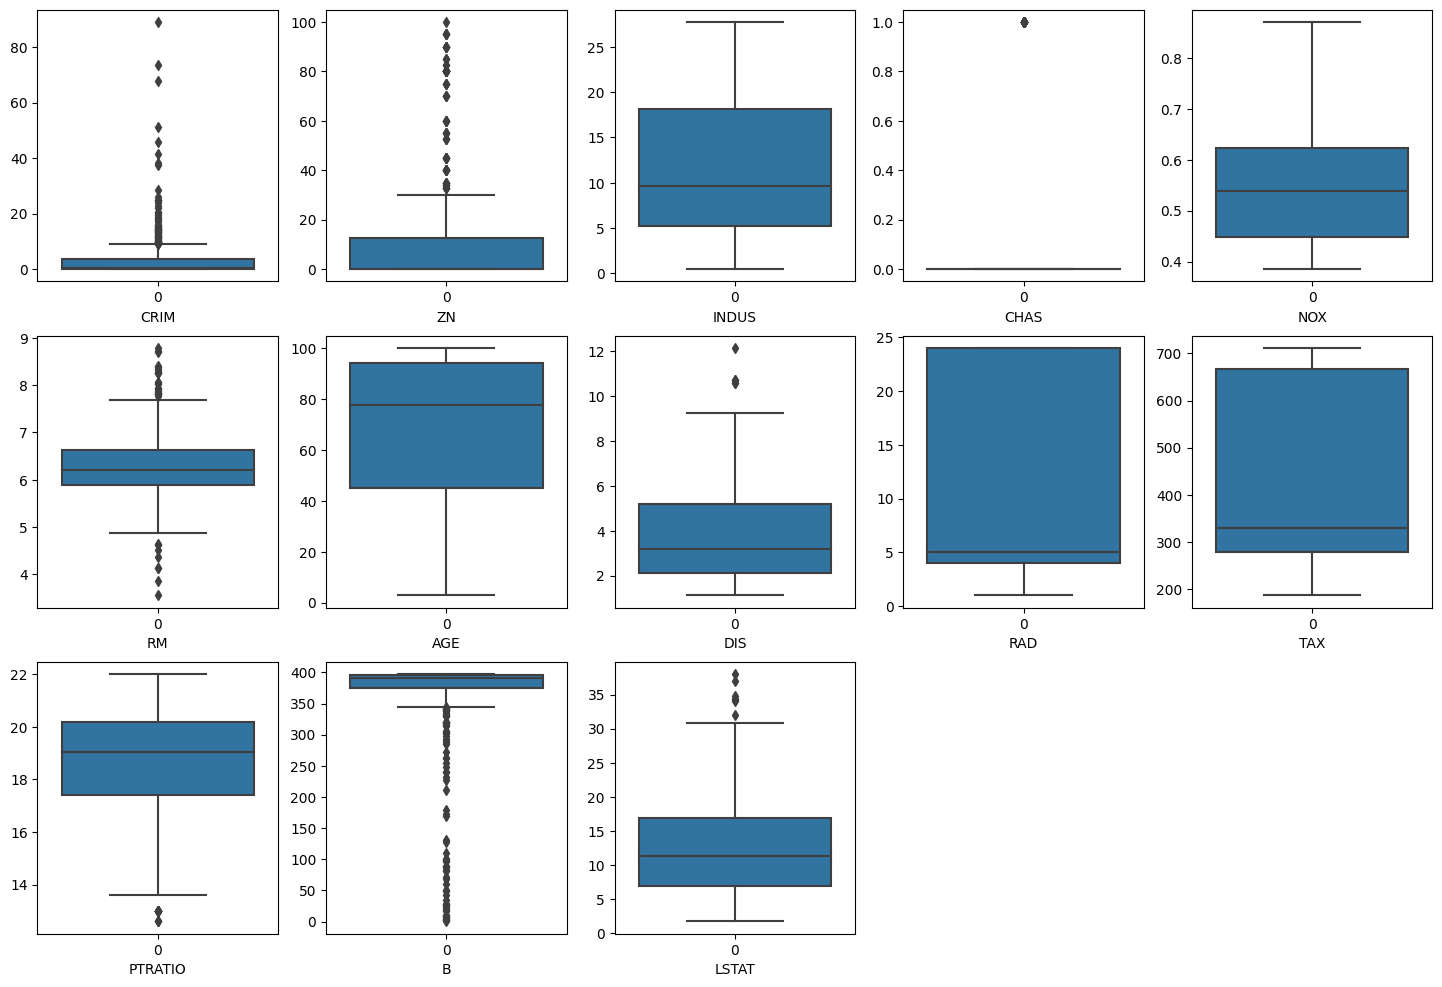

In [10]:
columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

plt.figure(figsize=(18, 12))

for columna in columns:
  
    plt.subplot(3, 5, df_houses.columns.get_loc(columna) + 1)
    sns.boxplot(data=df_houses[columna])
    plt.xlabel(columna)
    
    plt.show

Esta visualización nos permite ver las distribiciones de los outliers en cada variable. Ahora lo haremos de manera numérica, para ver cuantos outliers tiene cada variable.

In [11]:
columns = ["CRIM","ZN","INDUS","NOX","RM","AGE","DIS","TAX","PTRATIO","B","LSTAT"]

outlier_info=[]

for columna in columns:
    Q1 = df_houses[columna].quantile(0.25)
    Q3 = df_houses[columna].quantile(0.75)
    IQR = Q3-Q1

    # Se considera normalidad dentro de este rango IQR * 1.5
    umbral = IQR * 1.5 

    outliers = (df_houses[columna] < (Q1 - umbral)) | (df_houses[columna] > (Q3 + umbral))

    # Calcula el total de outliers
    total_outliers = outliers.sum()

# Calcula el % sobre el total de registros
    total_filas=len(df_houses)
    percentage_outliers = round((total_outliers / total_filas)*100,2)

    outlier_info.append({
        "Columna": columna,
        "Total Outliers": total_outliers,
        "Porcentaje Outliers": percentage_outliers
    })

# Crea un DataFrame con la información de outliers
outlier_df = pd.DataFrame(outlier_info)

# Muestra el DataFrame en un display
display(outlier_df)





,Columna,Total Outliers,Porcentaje Outliers
0,CRIM,66,13.04
1,ZN,68,13.44
2,INDUS,0,0.00
3,NOX,0,0.00
4,RM,30,5.93
5,AGE,0,0.00
6,DIS,5,0.99
7,TAX,0,0.00
8,PTRATIO,15,2.96
9,B,77,15.22


In [12]:
import pandas as pd

columns = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"]

# Lista para almacenar la información de outliers
outlier_info = []

# Calculamos los outliers para cada columna
for columna in columns:
    Q1 = df_houses[columna].quantile(0.25)
    Q3 = df_houses[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Se considera normalidad dentro de este rango IQR * 1.5
    umbral = IQR * 1.5

    outliers = (df_houses[columna] < (Q1 - umbral)) | (df_houses[columna] > (Q3 + umbral))

    # Calculamos el total de outliers
    total_outliers = outliers.sum()

    # Calculamos el % sobre el total de registros
    total_filas = len(df_houses)
    percentage_outliers = round((total_outliers / total_filas) * 100, 2)

    outlier_info.append({
        "Columna": columna,
        "Total Outliers": total_outliers,
        "Porcentaje Outliers": percentage_outliers
    })

# Creamos un DataFrame con la información de outliers
outlier_df = pd.DataFrame(outlier_info)

# Muestra el DataFrame en un display
display(outlier_df)


,Columna,Total Outliers,Porcentaje Outliers
0,CRIM,66,13.04
1,ZN,68,13.44
2,INDUS,0,0.00
3,NOX,0,0.00
4,RM,30,5.93
5,AGE,0,0.00
6,DIS,5,0.99
7,TAX,0,0.00
8,PTRATIO,15,2.96
9,B,77,15.22


Con estos datos podemos observar que las variables CRIM,ZN y B tienen un porcentaje muy elevado de outliers (entre un 13 y un 15%). En el caso de CRIM la tasa de criminalidad es muy baja en general, excepto en pocos barrios en la que la tasa es muy elevada (esos son los outliers). En los casos como la tasa de CRIM y la proporción de gente afroamericana "B" no es la misma en cada barrio. De manera que se entiende como normal.

Una vez evaluados los datos pasaremos a estandarizalos/normalizarlos. 



El siguiente paso será la normalización de los datos del dataset. Para ello seguiremos 3 pasos:

1. Estandarizaremos las variables que no tengan outliers con el método Minmax y las que tengan outliers con el escalado Robusto
2. Crearemos columnas dummies con el método One Hot Encoding para las variables que son categóricas. En este caso RAD y CHAS.

**Método MinMax**: es para las variables que no tienen outliers. En este caso son: "INDUS","NOX","AGE" y "TAX". 

**Test de robustez**: para las variables que si tienen outliers. Estas son: "CRIM", "ZN", "RM", "DIS", "PTRATIO","B","LSTAT" y "MEDV".

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Especificamos las columnas a escalar
columnas_a_escalar = ["INDUS", "NOX", "AGE", "TAX"]

df_houses_scaled = df_houses.copy()  # Creamos una copia del DataFrame original
df_houses_scaled[columnas_a_escalar] = scaler.fit_transform(df_houses[columnas_a_escalar])
df_houses_scaled = df_houses_scaled.round(4)
df_tr_sd_no = df_houses_scaled.copy()

display(df_tr_sd_no)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0063,18.0,0.0678,0,0.3148,6.575,0.6416,4.0900,1,0.2080,15.3,396.90,4.98,24.0
1,0.0273,0.0,0.2423,0,0.1728,6.421,0.7827,4.9671,2,0.1050,17.8,396.90,9.14,21.6
2,0.0273,0.0,0.2423,0,0.1728,7.185,0.5994,4.9671,2,0.1050,17.8,392.83,4.03,34.7
3,0.0324,0.0,0.0630,0,0.1502,6.998,0.4418,6.0622,3,0.0668,18.7,394.63,2.94,33.4
4,0.0690,0.0,0.0630,0,0.1502,7.147,0.5283,6.0622,3,0.0668,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0626,0.0,0.4205,0,0.3868,6.593,0.6818,2.4786,1,0.1641,21.0,391.99,9.67,22.4
502,0.0453,0.0,0.4205,0,0.3868,6.120,0.7600,2.2875,1,0.1641,21.0,396.90,9.08,20.6
503,0.0608,0.0,0.4205,0,0.3868,6.976,0.9073,2.1675,1,0.1641,21.0,396.90,5.64,23.9
504,0.1096,0.0,0.4205,0,0.3868,6.794,0.8898,2.3889,1,0.1641,21.0,393.45,6.48,22.0


Ahora que ya tenemos las variables sin outliers estandarizadas, el segundo paso es estandarizar las columnas que contienen outliers.

In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

#Especificamos las columnas a escalar:"CRIM", "ZN", "RM", "DIS", "PTRATIO","B","LSTAT" y "MEDV"
columnas_a_escalar= ["CRIM","ZN","RM","DIS","PTRATIO","B","LSTAT","MEDV"]

df_houses_scaled = df_tr_sd_no.copy()  # Creamos una copia del DataFrame original
df_houses_scaled[columnas_a_escalar] = scaler.fit_transform(df_tr_sd_no[columnas_a_escalar])

df_houses_scaled = df_houses_scaled.round(4)

df_tr_sd_def = df_houses_scaled.copy()

display(df_tr_sd_def)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.0696,1.44,0.0678,0,0.3148,0.4966,0.6416,0.2858,1,0.2080,-1.3393,0.2619,-0.6377,0.3511
1,-0.0638,0.00,0.2423,0,0.1728,0.2879,0.7827,0.5698,2,0.1050,-0.4464,0.2619,-0.2219,0.0502
2,-0.0638,0.00,0.2423,0,0.1728,1.3232,0.5994,0.5698,2,0.1050,-0.4464,0.0667,-0.7326,1.6928
3,-0.0624,0.00,0.0630,0,0.1502,1.0698,0.4418,0.9244,3,0.0668,-0.1250,0.1530,-0.8416,1.5298
4,-0.0522,0.00,0.0630,0,0.1502,1.2717,0.5283,0.9244,3,0.0668,-0.1250,0.2619,-0.6027,1.8809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.0539,0.00,0.4205,0,0.3868,0.5210,0.6818,-0.2360,1,0.1641,0.6964,0.0264,-0.1689,0.1505
502,-0.0588,0.00,0.4205,0,0.3868,-0.1199,0.7600,-0.2979,1,0.1641,0.6964,0.2619,-0.2279,-0.0752
503,-0.0545,0.00,0.4205,0,0.3868,1.0400,0.9073,-0.3367,1,0.1641,0.6964,0.2619,-0.5717,0.3386
504,-0.0409,0.00,0.4205,0,0.3868,0.7934,0.8898,-0.2651,1,0.1641,0.6964,0.0964,-0.4878,0.1003


Ahora ya tenemos todas las variables numéricas estandarizadas. El siguiente y último paso es convertir las columnas de categoría en columnas dummies. Empezaremos por la variable RAD. Antes de hacerlo, vamos a ver los valores que tiene y su frecuencia.

In [15]:
df_houses_rad = df_houses["RAD"].value_counts().sort_index()

porcentaje_total_rad = round((df_houses_rad / len(df_houses))*100,2)

resultados_df_rad = pd.DataFrame({
    "Valor": df_houses_rad.index,
    "Contador": df_houses_rad.values,
    "%": porcentaje_total_rad.values
})

resultados_df_rad

,Valor,Contador,%
0,1,20,3.95
1,2,24,4.74
2,3,38,7.51
3,4,110,21.74
4,5,115,22.73
5,6,26,5.14
6,7,17,3.36
7,8,24,4.74
8,24,132,26.09


In [16]:
df_houses_chas = df_houses["CHAS"].value_counts().sort_index()

# Calculamos el porcentaje del total
porcentaje_total = round((df_houses_chas / len(df_houses)) * 100,2)

# Creamos un DataFrame con tres columnas
resultados_df = pd.DataFrame({
    "Valor": df_houses_chas.index,
    "Contador": df_houses_chas.values,
    "%": porcentaje_total.values
})

resultados_df


,Valor,Contador,%
0,0,471,93.08
1,1,35,6.92


De esta manera hemos podido analizar más detenidamente la distribución de las variables de categoría. Con respecto a la categoría RAD está principalmente distribuida en los valores 3,4 y 8 con más de un 20% cada una. La categoría CHAS que significa si el terreno está tocando con el río (=1) o no (=0). Vemos que la mayoría de los terrenos no están tocando con el río.

Una vez analizadas las variables categóricas, es momento de pasar la variable RAD a columnas dummies con el método One Hot Encoding.

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
features_array = ohe.fit_transform(df_houses[["RAD"]]).toarray()

ohe.categories_
feature_labels = ["RAD1", "RAD2", "RAD3", "RAD4", "RAD5", "RAD6", "RAD7", "RAD8", "RAD24" ]
feature_labels
features = pd.DataFrame(features_array, columns = feature_labels)
features = features.astype(int)
features.head(5)

,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


Ahora añadiremos estas columnas al dataframe estandarizado y eliminaremos la columna RAD, la cual ya no es necesaria.

In [18]:
df_houses_d = pd.concat([df_tr_sd_def, features], axis=1)
df_houses_def= df_houses_d.drop(["RAD","RAD24"], axis=1)
display(df_houses_def)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8
0,-0.0696,1.44,0.0678,0,0.3148,0.4966,0.6416,0.2858,0.2080,-1.3393,...,-0.6377,0.3511,1,0,0,0,0,0,0,0
1,-0.0638,0.00,0.2423,0,0.1728,0.2879,0.7827,0.5698,0.1050,-0.4464,...,-0.2219,0.0502,0,1,0,0,0,0,0,0
2,-0.0638,0.00,0.2423,0,0.1728,1.3232,0.5994,0.5698,0.1050,-0.4464,...,-0.7326,1.6928,0,1,0,0,0,0,0,0
3,-0.0624,0.00,0.0630,0,0.1502,1.0698,0.4418,0.9244,0.0668,-0.1250,...,-0.8416,1.5298,0,0,1,0,0,0,0,0
4,-0.0522,0.00,0.0630,0,0.1502,1.2717,0.5283,0.9244,0.0668,-0.1250,...,-0.6027,1.8809,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.0539,0.00,0.4205,0,0.3868,0.5210,0.6818,-0.2360,0.1641,0.6964,...,-0.1689,0.1505,1,0,0,0,0,0,0,0
502,-0.0588,0.00,0.4205,0,0.3868,-0.1199,0.7600,-0.2979,0.1641,0.6964,...,-0.2279,-0.0752,1,0,0,0,0,0,0,0
503,-0.0545,0.00,0.4205,0,0.3868,1.0400,0.9073,-0.3367,0.1641,0.6964,...,-0.5717,0.3386,1,0,0,0,0,0,0,0
504,-0.0409,0.00,0.4205,0,0.3868,0.7934,0.8898,-0.2651,0.1641,0.6964,...,-0.4878,0.1003,1,0,0,0,0,0,0,0


Ahora nuestro dataset tiene 7 columnas más que antes. Ya que cuando hacemos las columnnas dummies, se puede eliminar la primera o la última, de manera que hemos eliminado la columna RAD24 también.

En el caso de la variable categorica "CHAS" al tratarse de una variable binaria con valores 1 y 0 no tiene sentido crear columnas dummies. De manera que la dejaremos tal y como está. 

Ya tenemos el dataset estandarizado. Para poder verlo de manera numérica y visual realizaremos varios pasos:
1. vista de estadísticas con **.describe()
2. vista de las frecuencias de cada columna
3. boxplot para ver los outliers

In [19]:
df_houses_def.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,0.933783,2.392625,-0.0696,-0.048575,0.00000,0.951475,24.6785
ZN,506.0,0.909091,1.865796,0.0000,0.000000,0.00000,1.000000,8.0000
INDUS,506.0,0.391370,0.251477,0.0000,0.173400,0.33830,0.646600,1.0000
NOX,506.0,0.349169,0.238431,0.0000,0.131700,0.31480,0.491800,1.0000
RM,506.0,0.103162,0.952057,-3.5874,-0.437625,0.00000,0.562350,3.4844
AGE,506.0,0.676365,0.289894,0.0000,0.433850,0.76825,0.938950,1.0000
DIS,506.0,0.190268,0.681850,-0.6728,-0.358550,0.00000,0.641500,2.8881
TAX,506.0,0.422202,0.321627,0.0000,0.175600,0.27290,0.914100,1.0000
PTRATIO,506.0,-0.212313,0.773194,-2.3036,-0.589300,0.00000,0.410700,1.0536
B,506.0,-1.667633,4.379177,-18.7610,-0.770500,0.00000,0.229550,0.2619


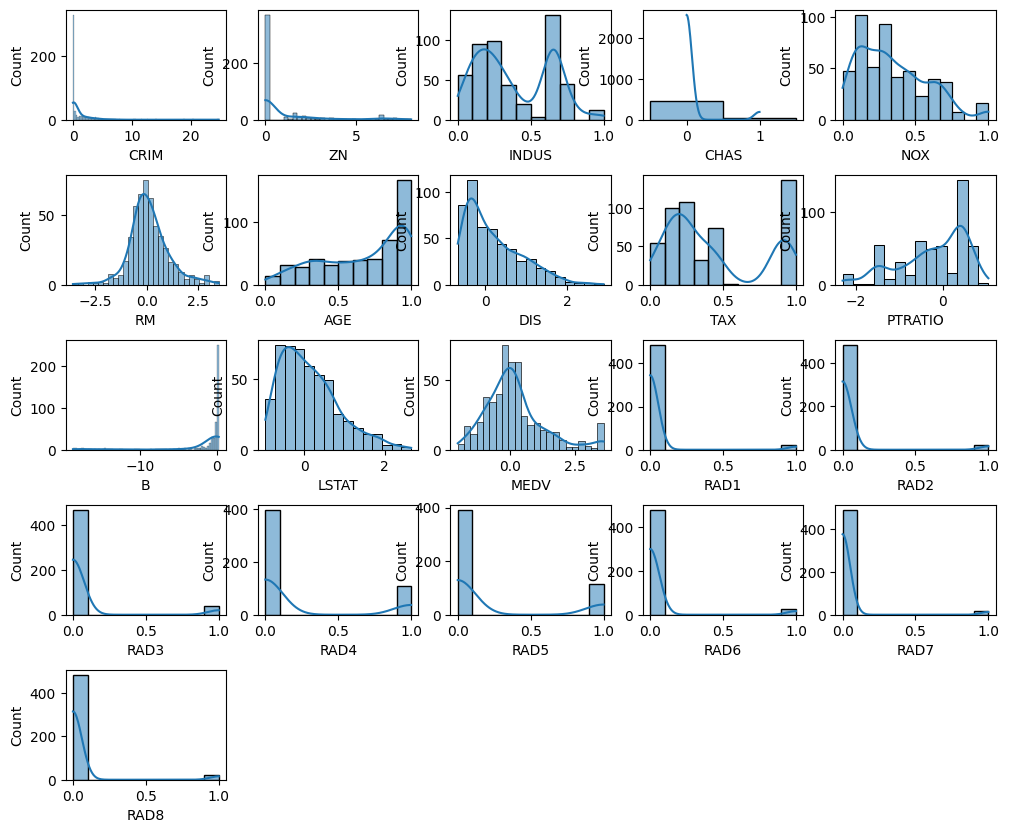

In [20]:
columns = df_houses_def.columns

plt.figure(figsize=(12, 10))

for columna in columns:
  
    plt.subplot(5, 5, df_houses_def.columns.get_loc(columna) + 1)
    sns.histplot(data=df_houses_def[columna],kde=True)
    plt.xlabel(columna)
    
    plt.subplots_adjust(hspace=0.5)
    
    plt.show

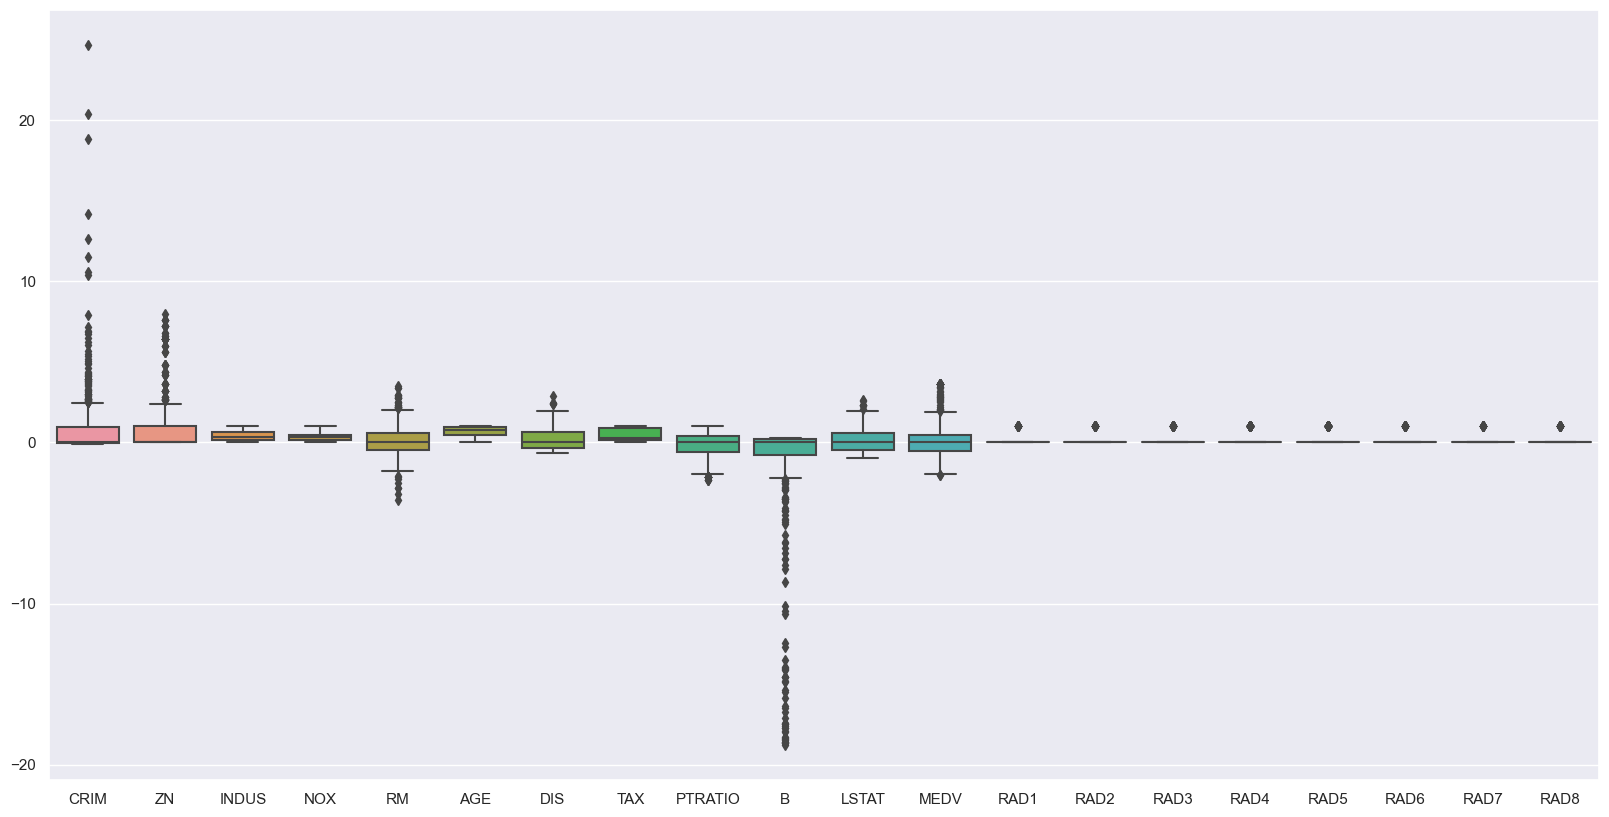

In [21]:
sns.set()
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(data=df_houses_def, orient='v')

Una vez hemos visto los gráficos de los datos estandarizados es el momento de crear dos subsets para entrenar los datos y para poder testarlos. Para crear los subsets hay que tener en cuenta la variable dependiente MEDV a la que asignaremos el valor y. Y el resto serán las variables independientes. Los tamaños seleccionados serán 80% para el train y 20% de los valores para el test.

In [22]:
from sklearn.model_selection import train_test_split

X= df_houses_def.drop("MEDV", axis=1)
y= df_houses_def["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

print("Tamaño de conjunto de entrenamiento:", len(X_train))
print("Tamaño de conjunto de prueba:", len(X_test))

Tamaño de conjunto de entrenamiento: 404
Tamaño de conjunto de prueba: 102


Para poder hacer una buena comparación vamos a crear una manera de visualizar las medias, desviacion, standard del dataset entero, del train y del test.

In [23]:
media_df = df_houses_def.drop("CHAS", axis=1).mean().round(3)
std_df = df_houses_def.drop("CHAS", axis=1).std().round(3)
min_df = df_houses_def.drop("CHAS", axis=1).min().round(3)
max_df = df_houses_def.drop("CHAS", axis=1).max().round(3)

media_train = X_train.drop("CHAS", axis=1).mean().round(3)
std_train = X_train.drop("CHAS", axis=1).std().round(3)
min_train = X_train.drop("CHAS", axis=1).min().round(3)
max_train = X_train.drop("CHAS", axis=1).max().round(3)

media_test = X_test.drop("CHAS", axis=1).mean().round(3)
std_test = X_test.drop("CHAS", axis=1).std().round(3)
min_test = X_test.drop("CHAS", axis=1).min().round(3)
max_test = X_test.drop("CHAS", axis=1).max().round(3)

estadisticas = pd.DataFrame({"Media df": media_df,
                             "Media Train": media_train,
                             "Media Test": media_test,
                             "Desv Std df": std_df,
                             "Desv Std Train": std_train,
                             "Desv Std Test": std_test,
                             "V Min df": min_df,
                             "V Min Train": min_train,
                             "V Min Test": min_test,
                             "V Max df": max_df,
                             "V Max Train": max_train,
                             "V Max Test": max_test})

display(estadisticas)


,Media df,Media Train,Media Test,Desv Std df,Desv Std Train,Desv Std Test,V Min df,V Min Train,V Min Test,V Max df,V Max Train,V Max Test
AGE,0.676,0.674,0.685,0.290,0.292,0.284,0.000,0.000,0.032,1.000,1.000,1.000
B,-1.668,-1.554,-2.119,4.379,4.181,5.086,-18.761,-18.656,-18.761,0.262,0.262,0.262
CRIM,0.934,0.875,1.166,2.393,2.285,2.780,-0.070,-0.070,-0.067,24.678,24.678,20.383
DIS,0.190,0.198,0.159,0.682,0.691,0.647,-0.673,-0.670,-0.673,2.888,2.888,2.389
INDUS,0.391,0.389,0.401,0.251,0.257,0.230,0.000,0.000,0.010,1.000,1.000,0.786
LSTAT,0.129,0.140,0.086,0.714,0.727,0.659,-0.962,-0.962,-0.848,2.660,2.660,1.925
MEDV,0.167,NaN,NaN,1.153,NaN,NaN,-2.031,NaN,NaN,3.611,NaN,NaN
NOX,0.349,0.343,0.374,0.238,0.238,0.241,0.000,0.000,0.018,1.000,1.000,1.000
PTRATIO,-0.212,-0.237,-0.115,0.773,0.775,0.763,-2.304,-2.304,-2.161,1.054,1.054,1.054
RAD1,0.040,0.045,0.020,0.195,0.207,0.139,0.000,0.000,0.000,1.000,1.000,1.000


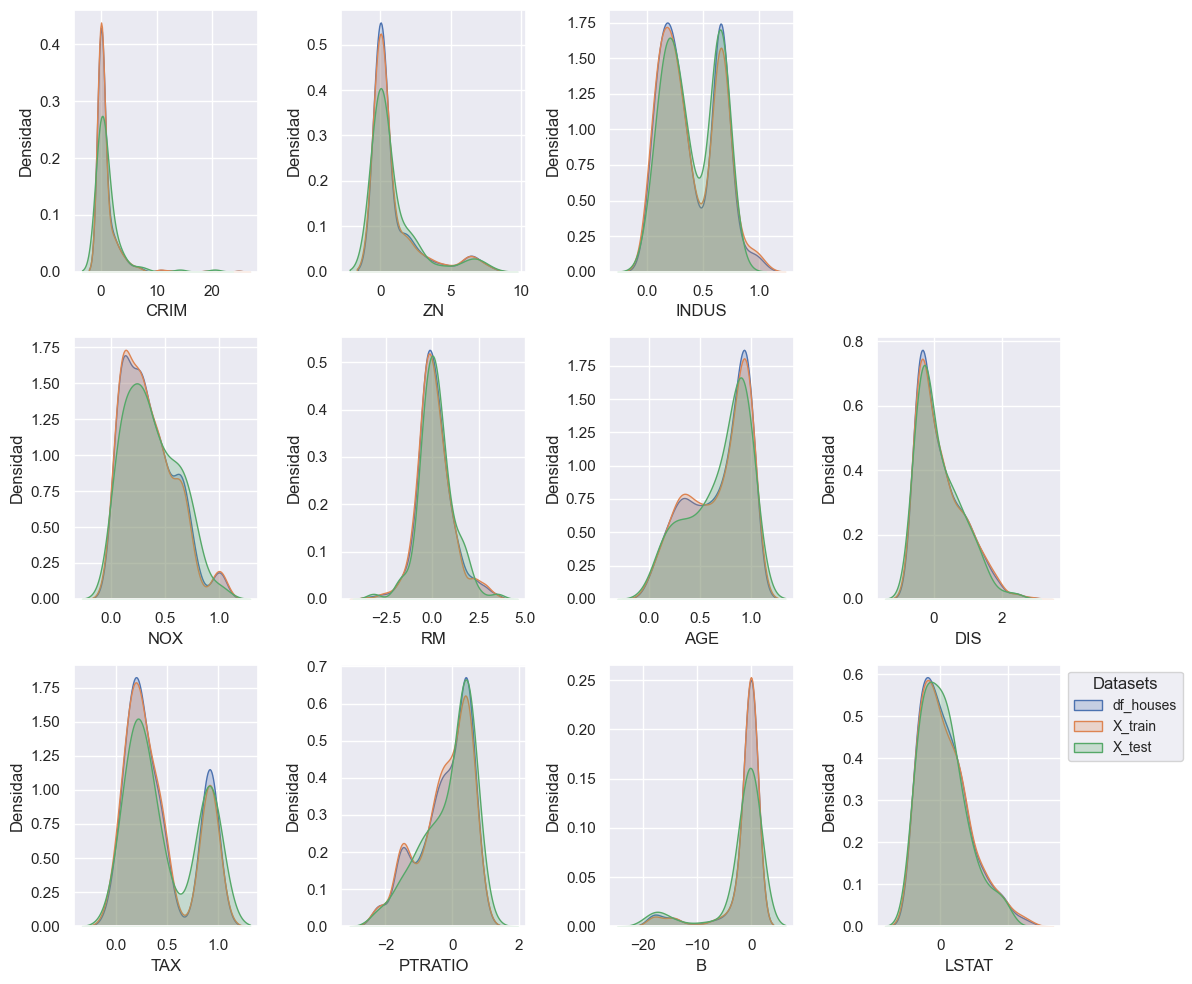

In [24]:
# Obtenemos una lista de nombres de columnas
columnas = df_houses_def[["CRIM","ZN","INDUS","NOX","RM","AGE","DIS","TAX","PTRATIO","B","LSTAT"]]

plt.figure(figsize=(12, 10)) 

legend_labels = []

# Iteramos a través de las columnas y trazar el gráfico de densidad de kernel para cada una de ellas
for columna in columnas:
    plt.subplot(3, 4, df_houses_def.columns.get_loc(columna) + 1)
    
    
    sns.kdeplot(data=df_houses_def[columna], label="df_houses", shade=True)
    sns.kdeplot(data=X_train[columna], label="X_train", shade=True)
    sns.kdeplot(data=X_test[columna], label="X_test", shade=True)
    
    plt.xlabel(columna)
    plt.ylabel("Densidad")
    legend_labels.extend(["df_houses", "X_train", "X_test"])


# Añadimos una leyenda general fuera de los gráficos
plt.legend(legend_labels, title="Datasets", loc="upper left", bbox_to_anchor=(1, 1), fontsize='small')


plt.tight_layout()

plt.show()

Podemos observar que las desviaciones de los datos son bastante pequeñas en general a excepción de las variables "CRIM" con una desviación de más de 2, la variable "B" con una desviación de más de 4. Esta es la que tiene una desviación más significativa debido a la gran cantidad de outliers que tiene. Y por último, la variable dependiente "MEDV" también muestra una desviación significativa, aunque no tan grande como las otras.

Ahora si vamos a empezar el ejercicio. 

**Nos pide que almenos creemos dos modelos de regressión diferentes para intentar predecir el mejor precio posible de las viviendas (MEDV) del archivo adjunto.**

Para este ejercicio haremos una regresión lineal y un random forest.

Vamos a empezar por la **regresión lineal**. Calcularemos varios atributos como: **R2, score, coef** e **intercept**.


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_lr = LinearRegression()

model_lr.fit(X_train,y_train)

y_predict_test = model_lr.predict(X_test)


print("Test R2 ", r2_score(y_test,y_predict_test).round(3))

score = model_lr.score(X_test, y_test)

print("Score:", score)



Test R2  0.585
Score: 0.5849597044377762


En el paso anterior hemos creado el modelo de regresión y hemoms calculado **R2** o coeficiente de determinación. Es una métrica estadística que se utiliza en el contexto de regresión para evaluar la bondad de ajuste de un modelo de regresión a los datos observados. Los valores de R2 van entre 0 a 1, siendo 0 un valor que informa que el modelo no se ajusta a los datos observados y 1 un modelo que se adapta totalmente.

También hemos calculado su **score** que es una métrica que mide la bondad de ajuste del modelo a los datos. En este caso, nos indica que este modelo se ajusta un 58% a los datos del test.

En este caso la adaptación de nuestro modelo a los datos del dataset test es de 0.585. Este modelo de regresión explica aproximadamente el 58% de la variabilidad en la variable dependiente MEDV.

In [26]:
coeficientes = pd.DataFrame({'Columna': X_train.columns, 'Coeficiente': model_lr.coef_})
coeficientes


,Columna,Coeficiente
0,CRIM,-0.056938
1,ZN,0.064041
2,INDUS,0.129891
3,CHAS,0.326218
4,NOX,-0.988939
5,RM,0.475084
6,AGE,-0.119182
7,DIS,-0.539486
8,TAX,-0.599769
9,PTRATIO,-0.341044


Este atributo almacena los coeficientes (pendientes) de las variables independientes en la ecuación de regresión lineal. Cada coeficiente está asociado a una variable independiente. De esta manera podemos determinar cuánto cambia la variable dependiente (Y) por un cambio unitario en la variable independiente (X). Podemos observar que hay valores positivos y negativos. Los positivos indican que si la variable independiente aumenta también lo hará la dependiente y en el caso de las negativas al contrario. 

In [27]:
intercepto = model_lr.intercept_

intercepto


1.256122891771607

El **intercepto** es el valor que tendría la variable dependiente, en este caso MEDV en caso de que todas las variables independientes tuvieran un valor de 0. En este caso sería de 1,256.


Ahora crearemos diferentes grágicas para nuestro modelo:

C:\Users\gemma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gemma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


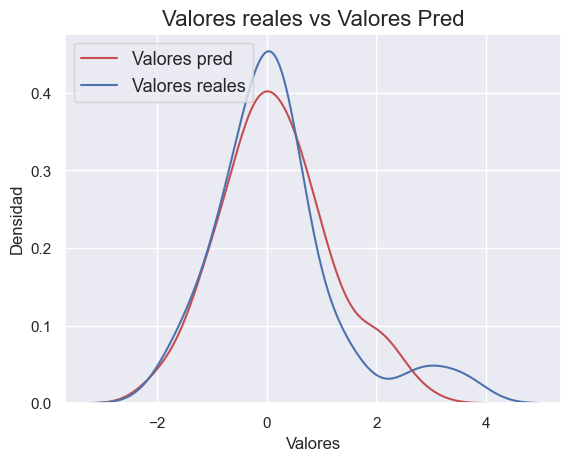

In [28]:
sns.distplot(y_predict_test, hist=False, color="r", label="Valores pred")
sns.distplot(y_test, hist=False, color="b", label="Valores reales")
plt.title("Valores reales vs Valores Pred", fontsize=16)
plt.xlabel("Valores", fontsize=12)
plt.ylabel("Densidad", fontsize=12)  # Cambio de 'Frequency' a 'Density'
plt.legend(loc='upper left', fontsize=13)


plt.show() 

En el gráfico de densidad  podemos observar que en algunos casos los valores reales (representados en azul) tienen un pico más alto que los valores predichos (representados en rojo), esto indica que en algunas regiones está haciendo predicciones que son más bajas de lo que deberían ser en esas regiones.

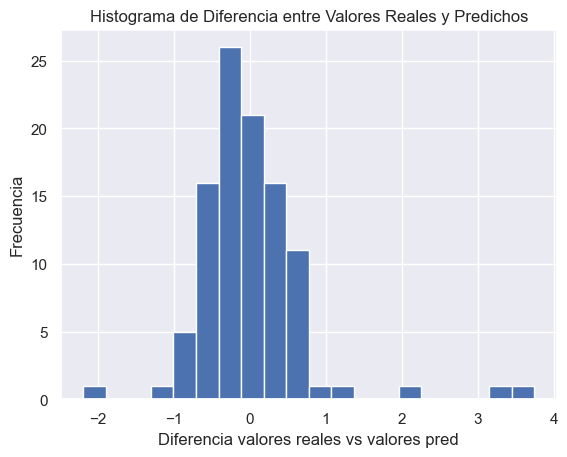

In [29]:
diferencia = y_test - y_predict_test

plt.hist(diferencia, bins=20)
plt.xlabel("Diferencia valores reales vs valores pred")
plt.ylabel("Frecuencia")
plt.title("Histograma de Diferencia entre Valores Reales y Predichos")
plt.show()

El siguiente modelo de regresión lo haré con **Random Forest**. es un algoritmo de aprendizaje automático que se utiliza tanto para tareas de clasificación como de regresión. Es una técnica que combina múltiples modelos de árboles de decisión para mejorar la precisión y la generalización del modelo.

In [30]:
from sklearn.ensemble import RandomForestRegressor 

model_rf = RandomForestRegressor(n_estimators=100, random_state=42) 

# Entrenamos el modelo en los datos de entrenamiento
model_rf.fit(X_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred = model_rf.predict(X_test)

# Calculamos su R2 y su MSE
from sklearn.metrics import r2_score, mean_squared_error
print("R2:", r2_score(y_test, y_pred))
print("Score:",model_rf.score(X_test,y_test))
print("MSE:", mean_squared_error(y_test, y_pred))


R2: 0.8125441212331239
Score: 0.8125441212331239
MSE: 0.2381688342165687


Los resultados de este modelo Random Forest indican que el modelo tiene un buen rendimiento en la predicción de los datos, con un alto coeficiente de determinación (R2) de 0,812 y un bajo error cuadrático medio (MSE) de 0,238. Esto sugiere que el modelo es capaz de hacer predicciones precisas y se ajusta bien a los datos utilizados para la evaluación.

El **R2 o Coeficiente de Determinación** con un valor de 0,8125 indica que el modelo explica aproximadamente el 81.25% de la variabilidad presente en los datos, es decir, que el modelo es capaz de hacer predicciones que se ajustan razonablemente bien a los valores reales.

El **MSE Error Cuadrático Medio** con un valor de 0,238 representa el promedio de los errores cuadrados entre las predicciones del modelo y los valores reales. Esto indica que el modelo tiene un buen ajuste a los datos y las predicciones son cercanas a los valores reales.


Ahora haremos una gráfica para determinar la importancia que tienen cada una de las variables independientes en el modelo Random Forest.

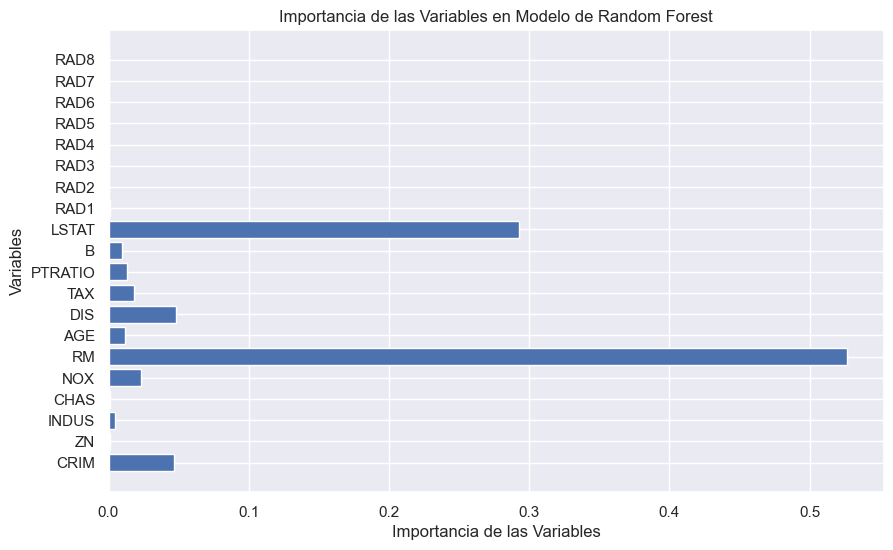

In [31]:
feature_importances = model_rf.feature_importances_

# los nombres de las variables
feature_names = X_train.columns  

# Crea un gráfico de barras para mostrar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align="center")
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel("Importancia de las Variables")
plt.ylabel("Variables")
plt.title("Importancia de las Variables en Modelo de Random Forest")
plt.show()


En este gráfico podemos observar cuales son las variables que tienen más importancia en el modelo creado de Random Forest. La variable RM es la más significativa, la segunda es LSTAT. El resto no tienen tanta relevancia.

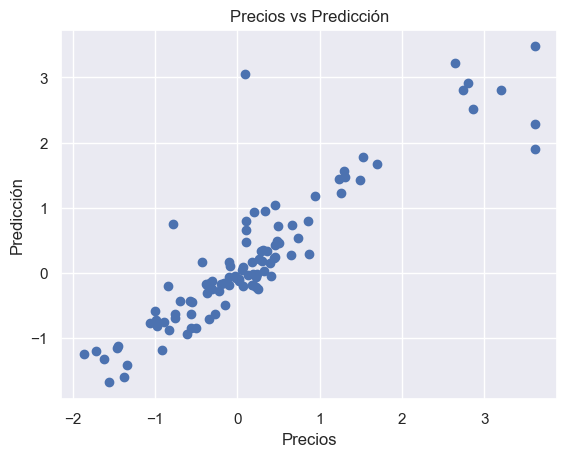

In [32]:
plt.scatter(y_test, y_pred)  
plt.xlabel("Precios")  
plt.ylabel("Predicción") 
plt.title("Precios vs Predicción") 
plt.show()

### Ejercicio 2


**Comparalos en base al MSE y al R2.**

Lo primero que haremos es calcular los valores solicitados y alguno más para cada uno de los modelos de regresión. Y luego los compararemos entre ellos.



In [33]:
# Empezamos a calcular los valores para la regresión lineal

# Coeficiente de determinación R2
from sklearn.metrics import r2_score

R_2= r2_score(y_test,y_predict_test)
R_2_Rf = r2_score(y_test, y_pred)

# Error absoluto máximo
from sklearn.metrics import max_error

M = max_error(y_test , y_predict_test)
M_Rf = max_error(y_test, y_pred)

# Error absoluto medio - MAE
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test,y_predict_test)
MAE_Rf = mean_absolute_error(y_test, y_pred)

# Error cuadrático medio - MSE
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,y_predict_test)
MSE_Rf = mean_squared_error(y_test, y_pred)

# Suma de los cuadrados de los residuos - RSS
from sklearn.metrics import mean_squared_error

RSS = mean_squared_error(y_test, y_predict_test)*len(y_predict_test)
RSS_Rf = mean_squared_error(y_test, y_pred) * len(y_pred)

# Raíz cuadrada del error cuadrático - RMSE
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test,y_predict_test, squared=False)
RMSE_Rf = mean_squared_error(y_test, y_pred, squared=False)

metricas = {
    "Métrica": ["R2","Error Absoluto Máximo", "Error Absoluto Medio (MAE)", "Error Cuadrático Medio (MSE)", "Suma de los Cuadrados de los Residuos (RSS)","Raíz cuadrada del error cuadrático (RMSE)"],
    "Reg Lineal": [R_2,M, MAE, MSE, RSS, RMSE],
    "Randon Forest":[R_2_Rf,M_Rf,MAE_Rf,MSE_Rf,RSS_Rf,RMSE_Rf]
}

# Creamos un DataFrame
tabla_metricas = pd.DataFrame(metricas)

display(tabla_metricas)




,Métrica,Reg Lineal,Randon Forest
0,R2,0.584960,0.812544
1,Error Absoluto Máximo,3.745349,2.957847
2,Error Absoluto Medio (MAE),0.472609,0.297705
3,Error Cuadrático Medio (MSE),0.527322,0.238169
4,Suma de los Cuadrados de los Residuos (RSS),53.786874,24.293221
5,Raíz cuadrada del error cuadrático (RMSE),0.726170,0.488025


Como ya he comentado anteriormente, **R2**, mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes en un modelo de regresión. En este caso, el modelo que se adapta más sería el Random Forest.

El **Error Absoluto Máximo** es la mayor diferencia entre el valor real y el valor predicho. En este caso el valor más bajo es del del modelo del Random Forest. Aunque la diferencia no es tan significativa. 

El **Error Absoluto Medio (MAE)** es la suma de las diferencias absolutas entre el valor real y el valor predicho para todos los puntos de datos en el conjunto de prueba, dividido por el número de puntos de datos. Mide el promedio de los errores absolutos y proporciona una idea de cuán cerca están las predicciones del valor real en promedio. Aquí también observamos que el valor más bajo de MAE lo tiene el modelo de previsión realizado con Random Forest.

EL **Error Cuadrático Medio (MSE)** es la suma de los cuadrados de las diferencias entre el valor real y el valor predicho para todos los puntos de datos en el conjunto de prueba, dividido por el número de puntos de datos. MSE penaliza más fuertemente los errores grandes que MAE y puede ser útil para identificar puntos de datos atípicos o valores atípicos. Aquí también observamos que el valor más bajo de MAE lo tiene el modelo de previsión realizado con Random Forest.

La **Suma de los Cuadrados de los Residuos (RSS)** es la suma de los cuadrados de las diferencias entre el valor real y el valor predicho para todos los puntos de datos en el conjunto de prueba. Es una métrica que se utiliza en la estimación de parámetros en modelos de regresión y se utiliza para medir cuán bien se ajusta el modelo a los datos. Aquí también observamos que el valor más bajo de MAE lo tiene el modelo de previsión realizado con Random Forest.

La **Raíz Cuadrada del Error Cuadrático Medio (RMSE)** es la raíz cuadrada del MSE. Proporciona una medida de la magnitud promedio de los errores en el modelo, en la misma unidad que la variable dependiente. El RMSE es una métrica comúnmente utilizada para evaluar el rendimiento de un modelo de regresión. Aquí también observamos que el valor más bajo de MAE lo tiene el modelo de previsión realizado con Random Forest.

En general podemos determinar que el mejor modelo de regresión para estos datos es el Random Forest, ya que los datos predecidos se adaptan mucho mejor a los datos reales que en el caso de la regresión lineal. Esto sugiere que el modelo Random Forest se ajusta mejor a los datos de prueba y hace predicciones más precisas en comparación con el modelo de Regresión Lineal.






###  Ejercicio 3

**Entrenalos utilitzando los diferentes parámetros que adminten para intentar mejorar la predicción.**




Para este ejercicio usaré **GridSearchCV**, una técnica utilizada en aprendizaje automático para encontrar la mejor combinación de hiperparámetros para un modelo dado, a través de la evaluación de múltiples configuraciones. Esta técnica es particularmente útil para optimizar el rendimiento de un modelo al ajustar los hiperparámetros.

Un **hiperparámetro** es un parámetro que no se aprende directamente del conjunto de datos durante el entrenamiento de un modelo de aprendizaje automático, sino que debe configurarse antes de iniciar el proceso de entrenamiento. Los hiperparámetros controlan diferentes aspectos del modelo y su comportamiento, y su elección adecuada es esencial para lograr un modelo de alta calidad y capacidad de generalización.

Los hiperparámetros más usuales para el **modelo de regresión lineal** son:

* **Tasa de Aprendizaje (Learning Rate)**: controla el tamaño de los pasos que se dan durante el proceso de optimización.

* **Número de Épocas (Epochs)**: En algoritmos de entrenamiento iterativo, el número de épocas representa cuántas veces se pasa por todo el conjunto de entrenamiento durante el proceso de entrenamiento. Es un hiperparámetro que controla cuántas iteraciones se realizarán.

* **Selección de Atributos (Feature Selection)**: puedes utilizar métodos como "Forward Stepwise Selection" o "Backward Stepwise Selection" para seleccionar el conjunto óptimo de atributos para tu modelo.

* **Métrica de Evaluación**: La elección de la métrica de evaluación también es importante y puede considerarse como un hiperparámetro, aunque no afecta directamente al proceso de entrenamiento. Puedes seleccionar la métrica de evaluación (como el error cuadrático medio o el coeficiente de determinación R2) que mejor se adapte a tu problema.

Primero de todo vamos a ver que hiperparámetros se han usado en el modelo de regresión lineal utilizado anteriormente.


In [34]:
from sklearn.model_selection import GridSearchCV

model_lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

Estos son los hiperparámetros usados en nuestro modelo: 

* **`copy_X` (Valor Predeterminado: True):** controla si se debe realizar una copia de los datos de entrada antes de realizar el ajuste del modelo. Si `copy_X` se establece en True, se copiarán los datos, lo que asegura que los datos de entrada originales no se modifiquen durante el proceso de entrenamiento. Si se establece en False, el ajuste del modelo se realizará en los datos originales.

2. **`fit_intercept` (Valor Predeterminado: True):** controla si se debe ajustar o no el término de intercepción (también conocido como sesgo) en el modelo. Si `fit_intercept` se establece en True, se ajustará un término de intercepción en el modelo. Si se establece en False, el modelo se ajustará sin un término de intercepción. La elección depende de si se espera que la relación entre las características y la variable objetivo pase por el origen (intercepción en cero) o no.

3. **`n_jobs` (Valor Predeterminado: None):** controla el número de núcleos de CPU que se utilizarán para realizar el cálculo. Si se establece en None (valor predeterminado), se utilizarán todos los núcleos disponibles. Puedes establecerlo en un número específico si deseas limitar el número de núcleos utilizados o establecerlo en -1 para utilizar todos los núcleos disponibles.

4. **`normalize` (Valor Predeterminado: 'deprecated'):** se recomienda no utilizarlo. La normalización de datos ahora se maneja de manera automática y más flexible en la biblioteca.

5. **`positive` (Valor Predeterminado: False):** Este hiperparámetro se usa en la regresión lineal positiva. Si `positive` se establece en True, el modelo se ajustará de manera que los coeficientes sean siempre no negativos. Esto puede ser útil en situaciones donde se espera que las variables predictoras tengan una relación positiva con la variable objetivo y no se permiten coeficientes negativos.



In [35]:
param_grid = {
    "copy_X": [True, False],
    "fit_intercept": [True, False],
    "positive": [True, False]
}
clf_1 = GridSearchCV(model_lr, param_grid, n_jobs=-1, cv=5, return_train_score=False)

# Ajustamos el modelo de búsqueda a tus datos, utilizando datos de entrenamiento
clf_1.fit(X_train, y_train)  

# Obtenemos los resultados de la búsqueda en un DataFrame
df_clf_1 = pd.DataFrame(clf_1.cv_results_)

# Ordenamos los resultados por rango de prueba (mejores combinaciones primero)
resultados_ordenados = df_clf_1[['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score', ascending=True)

# Mostramos los resultados ordenados
print(resultados_ordenados)



   mean_test_score  rank_test_score
1         0.751379                1
5         0.751379                1
3         0.731991                3
7         0.731991                3
0         0.649014                5
4         0.649014                5
2         0.646793                7
6         0.646793                7


El resultado es una tabla que muestra las combinaciones de hiperparámetros probadas, el puntaje promedio de prueba y el rango de puntaje de prueba. Esto permite identificar cuáles son los mejores hiperparámetros para tu modelo de regresión lineal en función de su rendimiento en la validación cruzada.

Las combinaciones con rango 1 y puntaje promedio de prueba de aproximadamente 0,751 son las mejores en términos de rendimiento en la prueba. Tienes dos combinaciones con el mismo rendimiento superior. Las combinaciones con rango 1 y 2 (las dos primeras filas) son las mejores en términos de rendimiento en la prueba, y las combinaciones con rangos más altos son menos efectivas en la validación cruzada.

Ahora lo crearemos con la mejor combinación.


In [36]:
# Filtramos la fila con rango 1 en los resultados de la búsqueda
mejor_combinacion = df_clf_1[df_clf_1["rank_test_score"] == 1]

# Extraemos los valores de los hiperparámetros de la mejor combinación
mejor_copy_X = mejor_combinacion["param_copy_X"].values[0]
mejor_fit_intercept = mejor_combinacion["param_fit_intercept"].values[0]
mejor_positive = mejor_combinacion["param_positive"].values[0]

# Creamos una instancia del modelo LinearRegression con los mejores hiperparámetros
from sklearn.linear_model import LinearRegression
modelo_mejor_combinacion = LinearRegression(copy_X=mejor_copy_X, fit_intercept=mejor_fit_intercept, positive=mejor_positive)

# Ajustamos el modelo utilizando tus datos de entrenamiento (X_train, y_train)
modelo_mejor_combinacion.fit(X_train, y_train)


# Calculamos el score en el conjunto de prueba
score = modelo_mejor_combinacion.score(X_test, y_test)

# Calculamos R2 en el conjunto de prueba
from sklearn.metrics import r2_score
y_pred = modelo_mejor_combinacion.predict(X_test)
r2 = r2_score(y_test, y_pred)


print("Score:", score)
print("R2:", r2)



Score: 0.5849597044377762
R2: 0.5849597044377762


Comparamos los resultados del R2 y del score del modelo de regresion inicial y del modelo que hemos hecho con la mejor combinación y nos da los mismos resultados para ambos modelos. Lo cual indica que ya desde el inicio se estaba usando la mejor combinación de hiperparámetros posible.

Ahora haremos lo mismo con el modelo **Random Forest**

Primero obtendremos sus hiperparámetros, para ver cuales podemos modificar.

In [37]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

He buscado el significado de cada uno para poder entenderlos más detalladament y saber cómo se podrían modificar.

*  **bootstrap**: Indica si se deben tomar muestras con reemplazo al construir árboles. Esto significa que algunas muestras pueden aparecer más de una vez en un árbol. Si es `False`, se utiliza un muestreo aleatorio sin reemplazo.

* **ccp_alpha**: Parámetro de complejidad de costo mínimo. Ayuda a regularizar el árbol eliminando nodos que no proporcionan un beneficio significativo en términos de reducción de impureza.

* **criterion**: Determina la función que se utilizará para medir la calidad de una división en un nodo del árbol.

* **max_depth**: Limita la profundidad máxima de los árboles de decisión individuales. Ayuda a evitar el sobreajuste. Si se establece en None, los árboles se expandirán hasta que contengan menos que `min_samples_split` muestras por hoja.

* **max_features**: Controla la cantidad de características que se considerarán al hacer divisiones en cada nodo. Puedes establecerlo en "auto" (equivalente a "sqrt"), "log2", un número entero o una fracción. Ayuda a diversificar los árboles.

* **max_leaf_nodes**: Establece el número máximo de nodos hoja en un árbol. Puede utilizarse en lugar de `max_depth` para limitar el crecimiento del árbol.

* **max_samples**: Establece el número máximo de muestras que se utilizarán para entrenar cada árbol individualmente. Puede ser útil para crear Bosques Aleatorios más pequeños.

* **min_impurity_decrease**: Establece un umbral para la disminución mínima de impureza requerida para dividir un nodo. Puede ayudar a controlar el crecimiento del árbol.

* **min_samples_leaf**: Establece el número mínimo de muestras requeridas para estar en una hoja. Al igual que `min_samples_split`, evita divisiones muy pequeñas.

* **min_samples_split**: Este parámetro establece el número mínimo de muestras necesarias para dividir un nodo interno. Un valor más alto evita divisiones muy pequeñas que pueden conducir al sobreajuste.

* **min_weight_fraction_leaf**: Establece la fracción mínima del total de pesos (de todas las muestras) que debe tener una hoja.

*  **n_estimators**: Este parámetro establece el número de árboles de decisión que se utilizarán en el conjunto. Cuantos más árboles, más robusto será el modelo, pero también aumentará el tiempo de entrenamiento. Un valor típico es 100.

* **n_jobs**: Controla la cantidad de trabajos en paralelo que se pueden ejecutar durante el entrenamiento. Si es `None`, se utiliza un solo núcleo de CPU. Si es -1, utiliza todos los núcleos disponibles.

* **oob_score**: Cuando está configurado en `True`, habilita el cálculo del puntaje fuera de la bolsa (Out-of-Bag) que es una estimación del rendimiento del modelo en datos no vistos durante el entrenamiento.

* **random_state**: Es una semilla aleatoria que se utiliza para inicializar el generador de números aleatorios. Esto asegura que el modelo sea reproducible.

* **verbose**: Controla la cantidad de información que se muestra durante el entrenamiento. Un valor más alto produce más mensajes.


Ahora, que ya sabemos qué significa cada uno. Definiremos nuevos valores para algunos de ellos.

In [38]:

param_gridRF = {
    "n_estimators": [50, 100, 150],
    "max_features": ["auto", "log2","sqrt"],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Realizamos la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_gridRF, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Para obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Utilizamos el modelo con los mejores hiperparámetros para hacer predicciones
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculamos su R2 y su MSE
from sklearn.metrics import r2_score, mean_squared_error
print("R2 con mejores hiperparámetros:", r2_score(y_test, y_pred))
print("MSE con mejores hiperparámetros:", mean_squared_error(y_test, y_pred))

Mejores hiperparámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
R2 con mejores hiperparámetros: 0.8161353700860039
MSE con mejores hiperparámetros: 0.2336060349152157


Comparando con los datos del Random Forest inicial R2: 0.8125441212331239 y MSE: 0.2381688342165687, observamos que ha habido variaciones, pero estas han sido muy poco significativas.

### - Ejercicio 4

**Compara seu rendimento usando la aproximación traint/test o usando todos los datos (validación interna).**

Para comparar su rendimiento he decidido usar la validación interna con el método **Cross Validation**.


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

cv_lr = cross_val_score(model_lr, X, y, cv=5, scoring='r2')
cv_rfr = cross_val_score(model_rf, X, y, cv=5, scoring='r2')


print("Resultados Regresion Lineal:", cv_lr)
print("Resultados Random Forest:", cv_rfr)


Resultados Regresion Lineal: [ 0.61239349  0.74278026  0.55363151  0.08097726 -0.36471261]
Resultados Random Forest: [0.77141708 0.86039163 0.74386125 0.473202   0.30428996]


Los resultados muestran los coeficientes de determinación más altos obtenidos utilizando una validación cruzada de 5 pliegues. En el modelo de **Regresión Lineal** podemos ver que en el segundo pliegue hay un score o coeficiente de determinación de 0,7427. Al igual que el modelo **Random Forest** donde el segundo pliego muestra un score de 0,860. El más elevado visto hasta el momento. 

Los resultados de Random Forest sugieren que el modelo Random Forest tiene un mejor rendimiento en términos de R2 en este conjunto de datos y muestra una mayor capacidad para ajustarse y predecir los datos en diferentes pliegues.



In [40]:
cv_lr_mod = cross_val_score(clf_1, X, y, cv=5, scoring='r2')
cv_rfr_mod = cross_val_score(best_model, X, y, cv=5, scoring='r2')


print("Resultados Regresion Lineal modificado:", cv_lr_mod)
print("Resultados Random Forest modificado:", cv_rfr_mod)


Resultados Regresion Lineal modificado: [ 0.65749027  0.7349922   0.55363151  0.04355756 -0.91178539]
Resultados Random Forest modificado: [0.73157134 0.82727788 0.70152796 0.46235763 0.28312563]


Podemos observar que los resultados del método Cross Validation con los modelos modificados no tiene en general valores más elevados, si no que en la mayoría de los casos son más bajos. Pero el modelo de Random Forest sigue siendo el que presenta una mayor fiabilidad.

### Ejercicio 5

**No uses la variable del número de habitaciones (RM) para hacer las predicciones.**

El ejercicio nos pide que omitamos la variable independiente RM para crear un  nuevo modelo y hacer predicciones. Esta variable es la que representa una correlación más alta con la variable dependiente. Vamos a ver cómo cambiarán nuestros modelos y predicciones. Usaremos el mismo random state así la comparación será más ajustada.

In [41]:
X = df_houses_def.drop(['MEDV','RM'], axis=1)
y = df_houses_def['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print("Tamaño de conjunto de entrenamiento:", len(X_train))
print("Tamaño de conjunto de prueba:", len(X_test))

Tamaño de conjunto de entrenamiento: 404
Tamaño de conjunto de prueba: 102


In [42]:
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)

Dimensiones de X_train: (404, 19)
Dimensiones de X_test: (102, 19)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_lr_no_rm = LinearRegression()

model_lr_no_rm.fit(X_train,y_train)

y_predict_test_no_rm = model_lr_no_rm.predict(X_test)


print("Test R2 ", r2_score(y_test,y_predict_test_no_rm).round(3))

score = model_lr_no_rm.score(X_test, y_test)

print("Score:", score)


Test R2  0.707
Score: 0.706686814945624


Los valores para la regresión lineal usando la variable independiente RM eran:
* R2  0.585
* Score: 0.5849597044377762

De manera que podemos confirmar que sin la variable independiente RM, los valores de predicción han mejorado mucho.

In [44]:
from sklearn.ensemble import RandomForestRegressor 

model_rf_no_rm = RandomForestRegressor(n_estimators=100, random_state=42) 

# Entrenamos el modelo en los datos de entrenamiento
model_rf_no_rm.fit(X_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred_no_rm = model_rf_no_rm.predict(X_test)

# Calculamos su R2 y su MSE
from sklearn.metrics import r2_score, mean_squared_error
print("R2:", r2_score(y_test, y_pred_no_rm))
print("MSE:", mean_squared_error(y_test, y_pred_no_rm))


R2: 0.796140620282856
MSE: 0.2590100194815784


Los valores para el modelo Random Forest usando la variable independiente RM eran: 
* R2: 0.8125441212331239
* Score: 0.8125441212331239

De esta manera podemos confirmar que para el modelo Random Forest no ha sido positivo sacar la variable independiente RM. Pero tanto con o sin esta variable podemos afirmar que el modelo Random Forest es más adecuado para predecir datos con este dataset.

Sin lugar a dudas aconsejaría usar Random Forest.